In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from pathlib import Path

# Data


In [2]:
weight=0.5
bias=0.2

start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight * X + bias

In [3]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900]]))

In [4]:
len(X),len(y)

(50, 50)

Splitting Data into Training Data and Testing Data

In [5]:
training_split=int(0.8*len(X))
X_train,y_train=X[:training_split],y[:training_split]
X_test,y_test=X[training_split:],y[training_split:]

len(X_train),len(X_test),len(y_train),len(y_test)


(40, 10, 40, 10)

Data Visualization

In [6]:
def plot_Predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     prediction=None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data,train_label,c="b",label="Traingin Data",s=4)

    plt.scatter(test_data,test_label,c="g",label="Testing Data",s=4)

    if prediction is not None:
        plt.scatter(test_data,prediction,c="r",s=4,label="prediction")
    
    plt.legend(prop={"size":14})



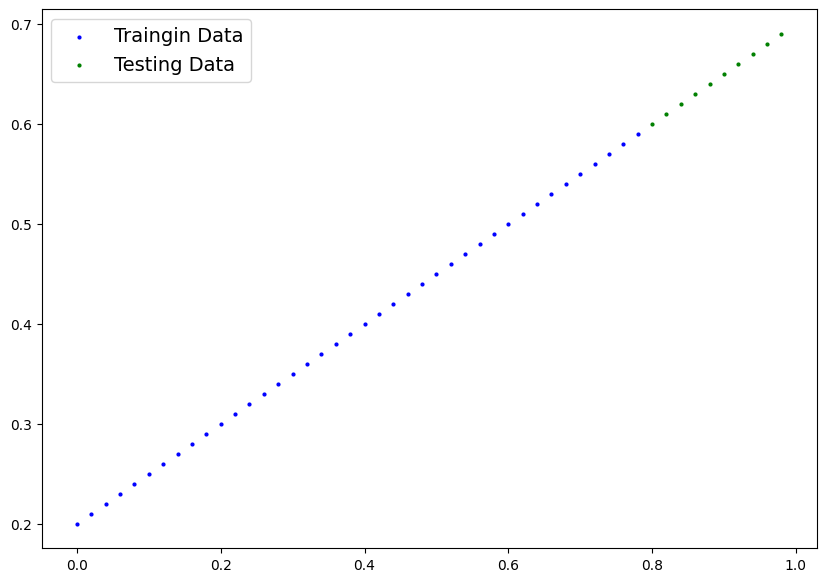

In [7]:
plot_Predictions()

Build PyTorch Model

In [12]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
        self.bias=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))

    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights *x +self.bias


    

In [13]:
torch.manual_seed(42)

model_1=LinearRegressionModel()
model_1

LinearRegressionModel()

In [14]:
list(model_1.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [15]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

Making Prediction

In [16]:
with torch.inference_mode():
    y_pred=model_1(X_test)
y_pred

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [17]:
y_test

tensor([[0.6000],
        [0.6100],
        [0.6200],
        [0.6300],
        [0.6400],
        [0.6500],
        [0.6600],
        [0.6700],
        [0.6800],
        [0.6900]])

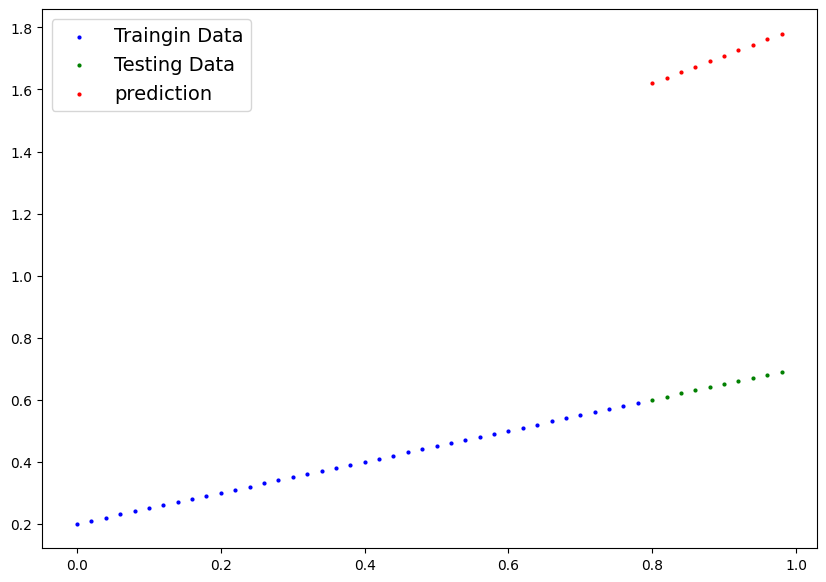

In [18]:
plot_Predictions(prediction=y_pred)

Training a Model 

* Loss function

In [19]:
loss_func=nn.L1Loss()
loss_func

L1Loss()

* Optimizer

In [20]:
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Building A Training Loop

In [49]:
epoch=106

epoch_count=[]
loss_value=[]
test_loss_values=[]

for epoch in range(epoch):
    model_1.train()

    y_preds=model_1(X_train)

    loss=loss_func(y_preds,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_pred=model_1(X_test)
        test_loss=loss_func(test_pred,y_test)
    
    if epoch % 10==0:
        epoch_count.append(epoch)
        loss_value.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch : {epoch} | Loss:{loss} loss : {test_loss}")

        print(model_1.state_dict())


Epoch : 0 | Loss:0.002812338527292013 loss : 0.007058781571686268
OrderedDict([('weights', tensor([0.5033])), ('bias', tensor([0.1900]))])
Epoch : 10 | Loss:0.002812338527292013 loss : 0.007058781571686268
OrderedDict([('weights', tensor([0.5033])), ('bias', tensor([0.1900]))])
Epoch : 20 | Loss:0.002812338527292013 loss : 0.007058781571686268
OrderedDict([('weights', tensor([0.5033])), ('bias', tensor([0.1900]))])
Epoch : 30 | Loss:0.002812338527292013 loss : 0.007058781571686268
OrderedDict([('weights', tensor([0.5033])), ('bias', tensor([0.1900]))])
Epoch : 40 | Loss:0.002812338527292013 loss : 0.007058781571686268
OrderedDict([('weights', tensor([0.5033])), ('bias', tensor([0.1900]))])
Epoch : 50 | Loss:0.002812338527292013 loss : 0.007058781571686268
OrderedDict([('weights', tensor([0.5033])), ('bias', tensor([0.1900]))])
Epoch : 60 | Loss:0.002812338527292013 loss : 0.007058781571686268
OrderedDict([('weights', tensor([0.5033])), ('bias', tensor([0.1900]))])
Epoch : 70 | Loss:0.0

In [50]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.5072])), ('bias', tensor([0.2000]))])

In [51]:
with torch.inference_mode():
    y_pred_new=model_1(X_test)

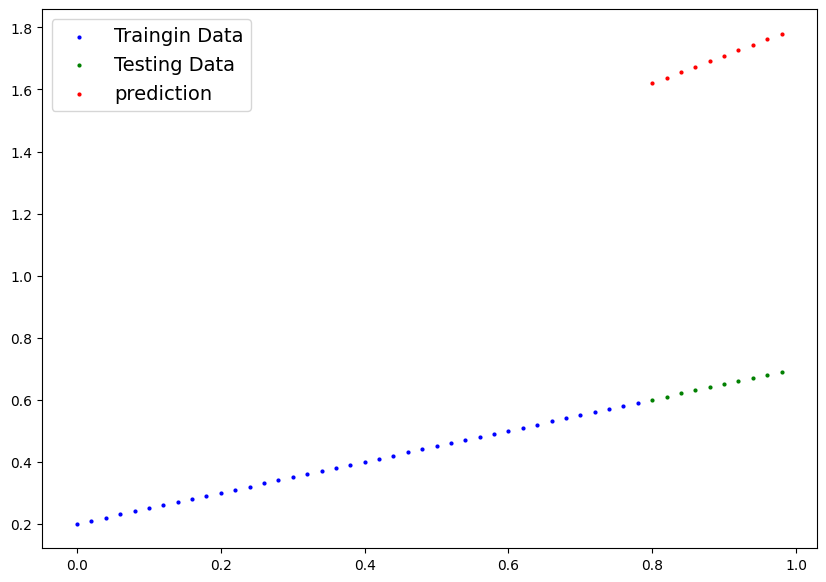

In [52]:
plot_Predictions(prediction=y_pred)

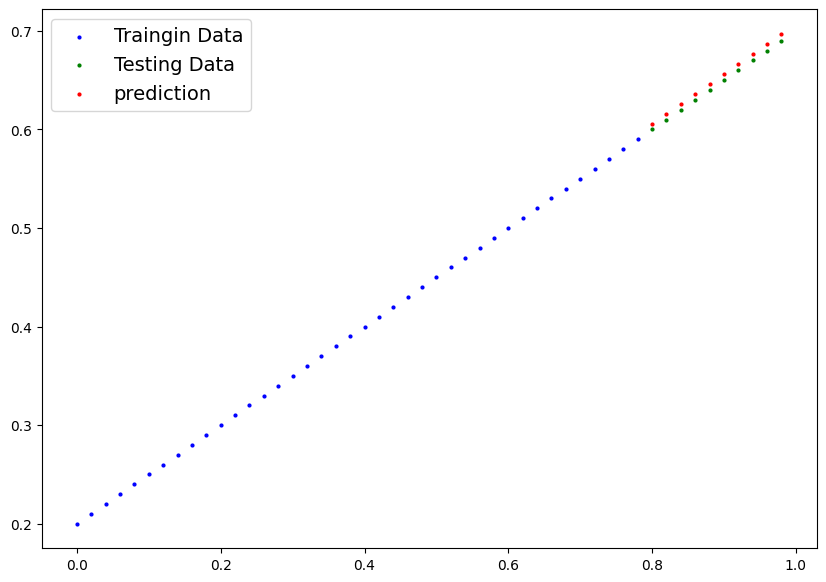

In [53]:
plot_Predictions(prediction=y_pred_new)

## Saving a Model in PyTorch

In [55]:
Model_Path=Path("models")
Model_Path.mkdir(parents=True,exist_ok=True)

#Create model save path
Model_Name="Linear_Model.pth"
Model_Save_Path=Model_Path / Model_Name

#Save the model State dict
print(f"Saving model to : {Model_Save_Path}")
torch.save(obj=model_1.state_dict(),f=Model_Save_Path)

Saving model to : models\Linear_Model.pth


## Loading The PyTorch Model

In [56]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.5072])), ('bias', tensor([0.2000]))])

In [57]:
loaded_model=LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=Model_Save_Path))

C:\Users\email\AppData\Local\Temp\ipykernel_38028\2696437374.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=Model_Save_Path))


<All keys matched successfully>

In [58]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.5072])), ('bias', tensor([0.2000]))])

In [59]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model(X_test)
loaded_model_preds

tensor([[0.6058],
        [0.6159],
        [0.6261],
        [0.6362],
        [0.6463],
        [0.6565],
        [0.6666],
        [0.6768],
        [0.6869],
        [0.6971]])

In [61]:
model_1.eval()
with torch.inference_mode():
    y_preds=model_1(X_test)
y_preds

tensor([[0.6058],
        [0.6159],
        [0.6261],
        [0.6362],
        [0.6463],
        [0.6565],
        [0.6666],
        [0.6768],
        [0.6869],
        [0.6971]])

In [62]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])